In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [79]:
gwq='calcium'
# reading data from the csv
data = pd.read_csv(r"..\Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data[gwq] = pd.to_numeric(data[gwq], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', gwq], inplace=True)

# defining the variables
X = data[['SDP']]  # Feature matrix
y = data[gwq]  # Target variable




In [80]:
import pandas as pd

# took the results from R code
coeff = 3.241e-05
intercept = 5.519e+01

y_pred1 = coeff * X.values.ravel() + intercept

# Convert y_pred to a Pandas Series
y_pred_series = pd.Series(y_pred1, index=X.index)



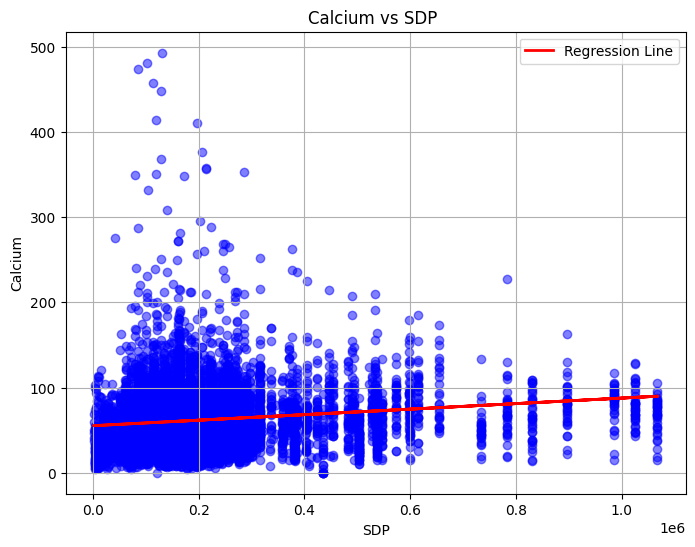

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, coeff * X + intercept, color='red', linewidth=2, label='Regression Line')
plt.title("Calcium vs SDP ")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.grid(True)
plt.legend()
plt.show()

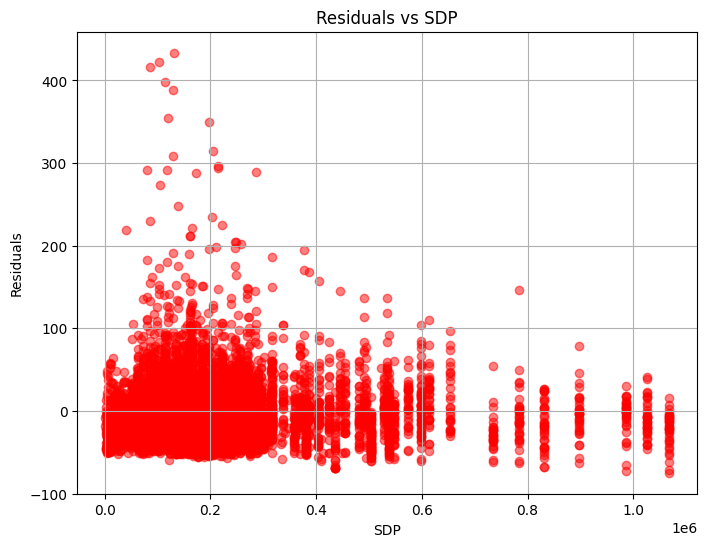

In [82]:
# Plot residuals vs calcium
residuals=y-y_pred_series
plt.figure(figsize=(8, 6))
plt.scatter(X, np.array(y-y_pred_series), color='red', alpha=0.5)
plt.title("Residuals vs SDP")
plt.xlabel("SDP")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

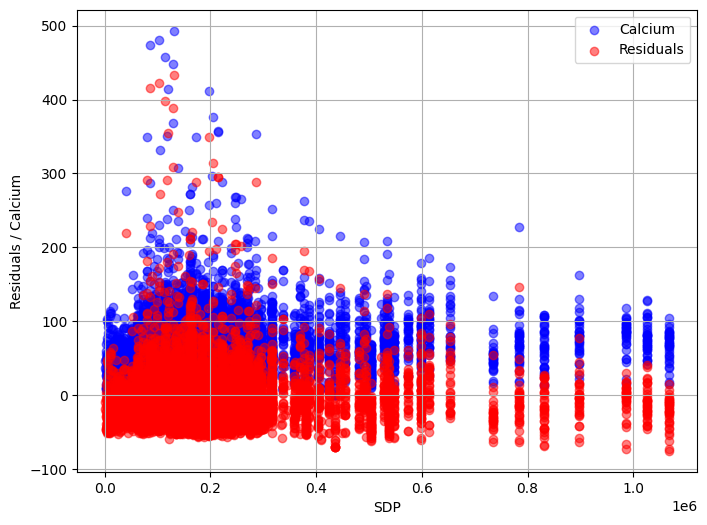

In [83]:
import matplotlib.pyplot as plt

# Plot residuals vs calcium
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Calcium')  # Add label for calcium
plt.scatter(X, residuals, color='red', alpha=0.5, label='Residuals')  # Add label for residuals

# Add title and labels
# plt.title("Groundwater Quality (Calcium) vs SDP Residuals")
plt.xlabel("SDP")
plt.ylabel("Residuals / Calcium")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


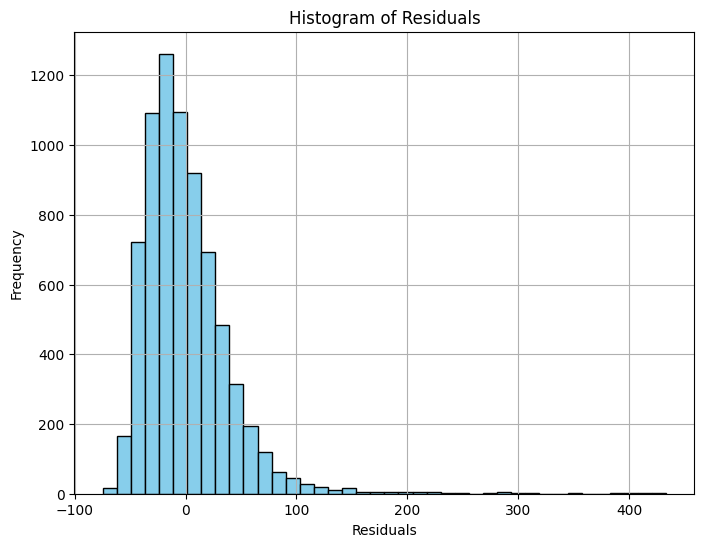

In [84]:
plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=40, color='#fa50ef', edgecolor='black')
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black')

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()